L
 [[[[ 1 -1]
   [ 2 -1]
   [ 3 -1]]

  [[ 4  2]
   [ 5  2]
   [ 6  2]]

  [[ 7  0]
   [ 8  1]
   [ 9  3]]]


 [[[19 28]
   [20 29]
   [21 30]]

  [[22 31]
   [23 32]
   [24 33]]

  [[25 34]
   [26 35]
   [27 36]]]]
F
 [[[[ 1  0]
   [-1  0]]

  [[ 2 -1]
   [ 0 -1]]]


 [[[ 0  1]
   [-1  2]]

  [[ 3 -1]
   [ 0 -1]]]]
delta_prime
 [[[[-1  0]
   [ 1 -1]]

  [[ 0  1]
   [ 2  0]]]


 [[[-2  0]
   [ 0  1]]

  [[ 0  0]
   [ 0  0]]]]
Forward step result L_prime
 [[[[ 4  3]
   [ 6  5]]

  [[13 21]
   [12 20]]]


 [[[ 0 69]
   [ 0 72]]

  [[ 0 78]
   [ 0 81]]]]
Backward step result L_delta
 [[[[-1.  0.]
   [ 2. -0.]
   [ 0. -0.]]

  [[-2.  2.]
   [ 0.  3.]
   [-2.  0.]]

  [[ 3. -0.]
   [ 4. -3.]
   [ 0. -2.]]]


 [[[-2.  0.]
   [ 2.  1.]
   [-1.  2.]]

  [[-4.  2.]
   [ 3.  1.]
   [ 0. -1.]]

  [[ 0.  0.]
   [ 0.  0.]
   [ 0.  0.]]]]
gradient with respect to filters:
[[[[-27. -52.]
   [-27. -54.]]

  [[-27. -60.]
   [-27. -58.]]]


 [[[ 22.  32.]
   [ 23.  33.]]

  [[ 25.  30.]
   [ 26.  32.]]]

/Users/qianyu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:51: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Users/qianyu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:58: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Iteration 0
forward complete: conv0
forward complete: conv1
forward complete: fc0
Activated output of last layer:
[array([[[  37.91917098,    8.26505867,   85.47295265,    0.        ,
            0.        ,  129.58258258,    0.        ,    0.        ,
            0.        ,    0.        ]]]), array([[[ 165.51934602,    0.        ,    0.        ,    0.        ,
            0.        ,    7.33202513,    0.        ,   79.22353153,
           12.32108429,    0.        ]]]), array([[[ 66.44985143,  38.09162116,   0.        ,   0.        ,
           0.        ,  98.60683926,   0.        ,  71.94580326,
          95.90473009,   0.        ]]]), array([[[  0.        ,   0.        ,  87.99425713,   0.        ,
           0.        ,   0.        ,   0.        ,  68.15220612,
           0.        ,   0.        ]]]), array([[[ 148.51022956,  112.6716368 ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,   39.00222096,
          114.07152197,    0.        ]]]), 

/Users/qianyu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=107.033946165, top=107.033946165
  'bottom=%s, top=%s') % (bottom, top))


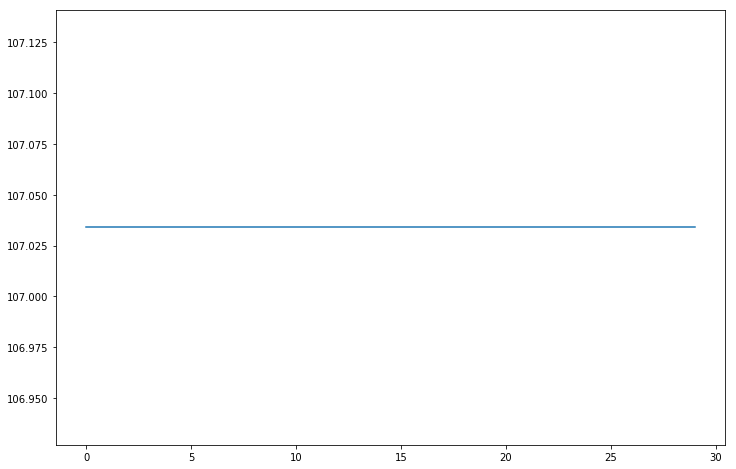

0     1
1     0
2     1
3     4
4     0
5     0
6     7
7     3
8     5
9     3
10    8
11    9
12    1
13    3
14    3
15    1
16    2
17    0
18    7
19    5
20    8
21    6
22    2
23    0
24    2
25    3
26    6
27    9
28    9
29    7
30    8
31    9
32    4
33    9
34    2
35    1
36    3
37    1
38    1
39    4
40    9
41    1
Name: label, dtype: int64
[5 0 5 2 0 7 7 7 3 7 2 2 5 7 0 7 7 0 7 0 5 0 6 8 7 0 5 0 7 7 0 7 2 7 2 7 7
 5 5 8 2 5]
0.166666666667


In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=[12, 8])  # set the default figure size


class CNNLayer():
    nfilter = None
    filters = None
    bias = None
    filter_shape = None
    stride = None
    activation = None
    delta = None
    out_delta = None
    X = None
    convOut = None
    convOut_no_act = None
    delta = None
    pad_in = 0
    pad_out = 0
    h_in = 0
    w_in = 0
    d_in = 0
    padX = None

    # filter_shape is (h,w,d)
    # stride is assumed to be 1
    def __init__(self, n, filter_shape, stride=1, activation="no_act"):
        self.nfilter = n  # number of filter
        self.filter_shape = filter_shape  # 3-d (height,width,depth)
        self.stride = stride
        self.activation = activation  # relu or no_act
        # initialize filters and bias
        # s = self.filter_shape[0]*self.filter_shape[1]*self.filter_shape[2]
        # self.bias = []
        # self.bias = np.random.randn(self.nfilter,1)*(2/s)
        # for i in range(self.nfilter):
        #    w = np.random.randn(s) * math.sqrt(2.0/s)
        #    self.filters.append(w.reshape(self.filter_shape[0],self.filter_shape[1],self.filter_shape[2]))

    # X has shape (N,h,w,d)
    # return the output
    def forward_step(self, X, pad=0):
        self.X = X
        self.pad_in = pad
        # if filters is not initialized by set_filters(), I am going to initialized them with small random numbers
        n = self.filter_shape[0] * self.filter_shape[1] * self.filter_shape[2]
        if (self.filters == None):
            self.filters = []
            # initialize filters
            for i in range(self.nfilter):
                w = np.random.randn(n) * math.sqrt(2.0 / n)
                self.filters.append(w.reshape(self.filter_shape[0], self.filter_shape[1], self.filter_shape[2]))
        self.filters = np.array(self.filters)
        if (self.bias == None):
            self.bias = np.random.uniform(low=0, high=math.sqrt(2 / n), size=(self.nfilter,))
        output = []
        self.X = X
        N = X.shape[0]
        h = X.shape[1]
        self.h_in = h
        w = X.shape[2]
        self.w_in = w
        d = X.shape[3]
        self.d_in = d
        nfilter = self.nfilter  # Number of filters
        fsize = self.filter_shape[1]
        outsize = int((w - fsize + 2 * pad) / self.stride + 1)
        convOut = []
        convOut_no_act = []
        self.padX = []
        for example in range(N):
            # pading
            padExample = np.lib.pad(X[example], ((pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
            self.padX.append(padExample)
            h_new = h + 2 * pad
            w_new = w + 2 * pad
            X_col = []  # matrix of inputs
            W_row = []  # matrix of filters
            # if self.stride!=1:
            for i in range(fsize - 1, h_new, self.stride):
                for j in range(fsize - 1, w_new, self.stride):
                    X_col.append(padExample[(i - fsize + 1):(i + 1), (j - fsize + 1):(j + 1), :].flatten())
            X_col = np.array(X_col)
            X_col = X_col.T
            # else:
            #    X_col = im2col_sliding_strided(padExample,self.filter_shape)
            for fIndex in range(nfilter):
                # W_row.append(im2col_sliding_strided(self.filters[fIndex],self.filter_shape)[:,0])
                W_row.append(self.filters[fIndex].flatten())
            W_row = np.array(W_row)
            out = np.dot(W_row, X_col) + self.bias.reshape(-1, 1)
            out = out.reshape((self.nfilter, outsize, outsize)).transpose((1, 2, 0))
            convOut.append(activate(out, self.activation))
            convOut_no_act.append(out)
        # return output of shape (N,h,w,d)
        self.convOut_no_act = convOut_no_act
        self.convOut = convOut
        # the output returned is activated
        return np.array(convOut)
        # return X_col,W_row,convOut

    def backward_step(self, out_delta):
        # out_delta_sum = sum(out_delta)
        self.out_delta = out_delta.copy()
        h = out_delta.shape[1]
        w = out_delta.shape[2]
        d = out_delta.shape[3]
        # reconstruct filters into d filters and flip each of them
        filters_new = []
        for d in range(self.filter_shape[2]):
            temp = np.zeros((self.filter_shape[0], self.filter_shape[1], self.nfilter))
            for i in range(self.nfilter):
                temp[:, :, i] = self.filters[i][:, :, d][::-1, ::-1]
            filters_new.append(temp)
        fsize_new = filters_new[0].shape[0]
        p = ((self.w_in + 2 * self.pad_in - 1) * self.stride + self.filter_shape[1] - out_delta.shape[2]) / 2
        if p != int(p):
            print("p is not an integer")
        p = int(p)
        self.pad_out = p
        h_new = h + 2 * p
        w_new = w + 2 * p
        self.delta = []
        for example in range(out_delta.shape[0]):
            padExample = np.lib.pad(out_delta[example], ((p, p), (p, p), (0, 0)), 'constant', constant_values=0)
            X_col = []
            W_row = []
            # if self.stride!=1:
            for i in range(fsize_new - 1, h_new, self.stride):
                for j in range(fsize_new - 1, w_new, self.stride):
                    X_col.append(padExample[(i - fsize_new + 1):(i + 1), (j - fsize_new + 1):(j + 1), :].flatten())
            X_col = np.array(X_col)
            X_col = X_col.T
            # else:
            #    X_col = im2col_sliding_strided(padExample,self.filter_shape)
            for fIndex in range(len(filters_new)):
                # W_row.append(im2col_sliding_strided(filters_new[fIndex],self.filter_shape)[:,0])
                W_row.append(filters_new[fIndex].flatten())
            W_row = np.array(W_row)
            out = np.dot(W_row, X_col)
            out = out.reshape((len(filters_new), self.w_in + 2 * self.pad_in, self.w_in + 2 * self.pad_in)).transpose(
                (1, 2, 0))
            gPrime = np.vectorize(activPrime)
            gPrimeIn = gPrime(self.padX[example], self.activation)
            self.testOut = out
            self.testgPrimeIn = gPrimeIn
            if self.activation != 'no_act':
                out = out * gPrimeIn
            self.delta.append(out)
        self.delta = np.array(self.delta)
        return self.delta

    # assume filters is a list of filters where each filter is list(bias,weight_matrix)
    # eg. A filter is like:
    # f1 = [[1],np.array([[[-1,-1,0],[0,-1,0],[0,0,-1]],[[0,-1,1],[-1,0,-1],[-1,1,1]],[[-1,0,0],[0,0,0],[1,-1,1]]])]
    def update(self, alpha):
        # out_delta_sum = sum(out_delta)
        h = self.h_in
        w = self.w_in
        d = self.d_in
        out_delta = self.out_delta
        # initialize f_delta, should finally have same size as filters
        f_delta_shape = (self.nfilter,) + self.filter_shape
        f_delta = np.zeros(f_delta_shape)
        b_delta_shape = self.bias.shape
        b_delta = np.zeros(b_delta_shape)
        X = self.X
        h_new = X.shape[1]
        w_new = X.shape[2]
        for example in range(out_delta.shape[0]):
            for d in range(out_delta.shape[3]):  # set each delta depth layer as a filter
                # self.bias[d] += np.sum(out_delta[example][:,:,d])
                b_delta[d] += np.sum(out_delta[example][:, :, d])
                f = np.dstack([out_delta[example][:, :, d]] * self.d_in)
                fsize = f.shape[0]
                h_i = 0
                for i in range(fsize - 1, h_new, self.stride):
                    w_i = 0
                    for j in range(fsize - 1, w_new, self.stride):
                        # testd = delta[example][(i-fsize+1):(i+1),(j-fsize+1):(j+1),:]
                        p = X[example][(i - fsize + 1):(i + 1), (j - fsize + 1):(j + 1), :] * f
                        f_delta[d][h_i, w_i, :] += np.sum(np.sum(p, 0), 0)
                        w_i += 1
                    h_i += 1
        self.bias = self.bias + alpha / out_delta.shape[0] * b_delta
        self.filters = self.filters + alpha / out_delta.shape[0] * f_delta
        print("gradient with respect to filters:")
        print(f_delta)
        print("gradient with respect to biases:")
        print(b_delta)
        return f_delta

    #     def update(self,alpha=0):
    #         out_delta_sum = sum(self.out_delta)
    #         h = self.h_in
    #         w = self.w_in
    #         d = self.d_in
    #         #out_delta = self.out_delta
    #         #initialize f_delta, should finally have same size as filters
    #         f_delta_shape = (self.nfilter,)+self.filter_shape
    #         f_delta = np.zeros(f_delta_shape)
    #         m = self.X.shape[0]
    #         X_sum = sum(self.X)
    #         h_new = X_sum.shape[0]
    #         w_new = X_sum.shape[1]
    #         #for example in range(out_delta.shape[0]):
    #         for d in range(out_delta_sum.shape[2]): # set each delta depth layer as a filter
    #             #update bias
    #             self.bias[d] += np.sum(out_delta_sum[:,:,d])
    #             f = np.dstack([out_delta_sum[:,:,d]]*self.d_in)
    #             fsize = f.shape[0]
    #             h_i = 0
    #             for i in range(fsize-1,h_new,self.stride):
    #                 w_i = 0
    #                 for j in range(fsize-1,w_new,self.stride):
    #                     #testd = delta[example][(i-fsize+1):(i+1),(j-fsize+1):(j+1),:]
    #                     p = X_sum[(i-fsize+1):(i+1),(j-fsize+1):(j+1),:]*f
    #                     f_delta[d][h_i,w_i,:] = np.sum(np.sum(p,0),0)
    #                     w_i += 1
    #                 h_i += 1
    #         #print(f_delta)
    #         self.filters = self.filters + alpha/m * f_delta
    #         return f_delta

    def print(self):
        for i in range(self.filters.shape[0]):
            print("Filter " + str(i) + " is:(print by depth layer)")
            self.printAfilter(self.filters[i])
        return

    def printAfilter(self, filter):
        for d in range(filter.shape[2]):
            print("layer of depth " + str(d))
            for h in range(filter.shape[0]):
                for w in range(filter.shape[1]):
                    print(filter[h, w, d], end=" ")
                print("")

    def set_filters(self, filters, biases):
        if (filters.shape[0] != self.nfilter) or (biases.shape[0] != self.nfilter):
            print("number of filters does not match!")
            return
        if (np.all(filters.shape[1:4] != self.filter_shape)):
            print("shape of filters does not match")
            return
        self.filters = filters
        self.bias = biases


# activation function
def activate(output, activation):
    if activation == 'relu':
        return np.maximum(output, 0)
    elif activation == 'no_act':
        return output


def activPrime(x, activation):
    if activation == 'relu':
        return reluPrime(x)
    elif activation == 'no_act':
        return 1


def reluPrime(x):
    if x > 0:
        return 1
    else:
        return 0


# only work for stride=1
# def im2col_sliding_strided(A, BSZ, stepsize=1):
#     # Parameters
#     m,n,d = A.shape
#     s0, s1, s2 = A.strides
#     nrows = (m-BSZ[0])+1
#     ncols = (n-BSZ[1])+1
#     shp = BSZ[0],BSZ[1],BSZ[2],nrows,ncols,1
#     strd = s0,s1,s2,s0,s1,s2

#     out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
#     return out_view.reshape(BSZ[0]*BSZ[1]*BSZ[2],-1)[:,::stepsize]

class CNN():
    X = None
    y = None
    ConvLayers = None
    conv = None  # number of convolutional layer
    FCLayers = None  # FCLayers is also a list of CNNLayer()
    fc = None  # number of fully-connected layer
    nfilters_conv = None  # list number of filters in each conv layer
    nfilters_fc = None  # list number of filters in each fc layer
    fshape_conv = None  # list of filter shape in each layer,contains height&width e.g [(h,w),...]
    fshape_fc = None  # list of filter shape in each layer,only contains depth e.g [d,...]
    activation = None

    def __init__(self, conv, fc, nfilters_conv, nfilters_fc, fshape_conv, fshape_fc, activation='no_act'):
        self.conv = conv
        self.fc = fc
        self.ConvLayers = []
        self.FCLayers = []
        if len(nfilters_conv) != conv or len(nfilters_fc) != fc:
            print("nfilters: length does not match!")
            return
        if len(fshape_conv) != conv or len(fshape_fc) != fc:
            print("fshape: length does not match!")
            return
        self.nfilters_conv = nfilters_conv
        self.nfilters_fc = nfilters_fc
        self.fshape_conv = fshape_conv
        self.fshape_fc = fshape_fc
        self.activation = activation
        for i in range(conv):
            self.ConvLayers.append(CNNLayer(nfilters_conv[i], fshape_conv[i], activation=activation))
        for j in range(fc):
            self.FCLayers.append(CNNLayer(nfilters_fc[j], fshape_fc[j], activation=activation))

    # Assume X is 4-d array, y is 1-d array
    def fit(self, X, y, alpha, t):
        self.X = X
        self.y = y
        m = X.shape[0]
        hLoss = []
        for it in range(t):
            print("Iteration " + str(it))
            input = X
            # forward propagation
            i = 0
            for cl in self.ConvLayers:
                # cl.filter_shape = (cl.filter_shape[0],cl.filter_shape[1],input.shape[3])
                input = cl.forward_step(input)
                # print(input.shape)
                print("forward complete: conv" + str(i))
                # cl.print()
                i += 1
            i = 0
            for fc in self.FCLayers:
                # fc.filter_shape = input.shape[1:]
                input = fc.forward_step(input)
                print("forward complete: fc" + str(i))
                # fc.print()
                i += 1
            # Compute gradient of Hinge Loss
            out_delta = []
            lastl = self.FCLayers[-1]
            # print(lastl.convOut_no_act[0])
            print("Activated output of last layer:")
            print(lastl.convOut)
            loss = hingeLoss(y, lastl.convOut)
            print("loss:")
            print(loss)
            hLoss.append(loss)
            for i in range(m):
                # for each example, compute delta
                gPrime = np.vectorize(activPrime)
                gradientHLoss = gradientHingeLoss(y[i], lastl.convOut[i])
                print("gradient Hinge Loss:")
                print(gradientHLoss)
                out_delta.append(gPrime(lastl.convOut_no_act[i], lastl.activation) * gradientHLoss)
            out_delta = np.array(out_delta)
            # backward propagation
            for l in range(self.fc - 1, -1, -1):  # starts from second last layer
                out_delta = self.FCLayers[l].backward_step(out_delta)
                print("backward complete: fc" + str(l))
            for l in range(self.conv - 1, -1, -1):
                out_delta = self.ConvLayers[l].backward_step(out_delta)
                print("backward complete: conv" + str(l))
            # update weights in conv layers
            for cl in self.ConvLayers:
                cl.update(alpha)
                print("update complete: conv" + str(l))
            # update weights in fc layers
            for fc in self.FCLayers:
                fc.update(alpha)
                print("update complete: fc" + str(l))
            input = X
            for cl in self.ConvLayers:
                input = cl.forward_step(input, 0)
            # fc layer forward propagation
            for fc in self.FCLayers:
                input = fc.forward_step(input)
                #         loss = hingeLoss(y,input)
                #         hLoss.append(loss)
                #         print(hLoss)
        ymin = np.min(hLoss)
        ymax = np.max(hLoss)
        axes = plt.gca()
        axes.set_ylim([ymin, ymax])
        plt.plot(range(len(hLoss)), hLoss)
        plt.show()

    def predict(self, T):
        input = T
        y_predict = []
        # conv layer forward propagation
        for cl in self.ConvLayers:
            input = cl.forward_step(input, 0)
        # fc layer forward propagation
        for fc in self.FCLayers:
            input = fc.forward_step(input)
        for i in range(input.shape[0]):
            y_predict.append(input[i].argmax())
        return np.array(y_predict)


# def hingeLoss(y,yhat):
#     sum = 0
#     m = y.shape[0]
#     for i in range(m):
#         sum+=np.sum(np.maximum(0,yhat[i]-yhat[i][:,:,y[i]][0]+1))-1
#     return sum/m

# loss = max(0,1-(w_y-w_k)) = max(0,1-w_y+w_k)
# for all examples
def hingeLoss(y, yhat):
    sum = 0
    m = y.shape[0]
    for i in range(m):
        w_y = yhat[i][:, :, y[i]][0][0]
        yhat[i][:, :, y[i]] = 0
        w_k = np.amax(yhat[i])
        sum += np.sum(1 - w_y + w_k)
    return sum / m


# gradientHingeLoss for a single example
# def gradientHingeLoss(y,yhat): #y is a label, yhat is an array of floats
#     n = 0
#     delta = np.zeros((1,1,yhat.shape[2]))
#     for i in range(yhat.shape[2]):  #depth is number of labels
#         if i!=y:
#             if (yhat[:,:,i]+1<yhat[:,:,y]):
#                 delta[:,:,i] = 0
#             else:
#                 delta[:,:,i] = 1
#                 n += 1
#     delta[:,:,y] = -n
#     return delta

# for a single example
def gradientHingeLoss(y, yhat):
    w_y = yhat[:, :, y]
    yhat[:, :, y] = 0
    k = np.argmax(yhat)
    w_k = yhat[:, :, k]
    delta = np.zeros((1, 1, yhat.shape[2]))
    for i in range(yhat.shape[2]):
        if (i == y) and (w_y - w_k) < 1:
            delta[:, :, i] = -1
        elif (i == k) and (w_y - w_k) < 1:
            delta[:, :, i] = 1
        else:
            delta[:, :, i] = 0
    return delta


# y and yhat are arrays of labels
def accuracy(y, yhat):
    print(y)
    print(yhat)
    return sum(y == yhat) / y.shape[0]


# Professor Amitabh's test example
L = np.array(
    [
        [  # Example 0
            [  # Depth 0
                [1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]
            ],
            [  # Depth 1
                [-1, -1, -1],
                [2, 2, 2],
                [0, 1, 3]
            ]
        ],
        [  # Example 1
            [  # Depth 0
                [19, 20, 21],
                [22, 23, 24],
                [25, 26, 27]
            ],
            [  # Depth 1
                [28, 29, 30],
                [31, 32, 33],
                [34, 35, 36]
            ]
        ]
    ])

F = np.array(
    [
        [  # Filter 0
            [  # Depth 0
                [1, -1],
                [2, 0]
            ],
            [  # Depth 1
                [0, 0],
                [-1, -1]
            ]
        ],
        [  # Filter 1
            [  # Depth 0
                [0, -1],
                [3, 0]
            ],
            [  # Depth 1
                [1, 2],
                [-1, -1]
            ]
        ]
    ]
)

delta_prime = np.array(
    [
        [  # Example 0
            [  # Depth 0 (this corresponds to Filter 0,
                #          not L Depth 0)
                [-1, 1],
                [0, 2]
            ],
            [  # Depth 1
                [0, -1],
                [1, 0]
            ]
        ],
        [  # Example 1
            [  # Depth 0
                [-2, 0],
                [0, 0]
            ],
            [  # Depth 1
                [0, 1],
                [0, 0]
            ]
        ]

    ])

# Convert L from (example, depth, height, width) to
# (example, height, widht, depth)

L = np.rollaxis(L, 2, 1)
L = np.rollaxis(L, 3, 2)
print("L\n", L)

# Convert F from (filter, depth, height, width) to
# (filter, height, width, depth)
F = np.rollaxis(F, 2, 1)
F = np.rollaxis(F, 3, 2)
print("F\n", F)

# Convert delta_prime from (example, depth, height, width) to
# (example, height, width, depth)
delta_prime = np.rollaxis(delta_prime, 2, 1)
delta_prime = np.rollaxis(delta_prime, 3, 2)
print("delta_prime\n", delta_prime)

conv = CNNLayer(2, (2, 2, 2), activation='relu')
conv.set_filters(F, biases=np.array([1, 0]))
print("Forward step result L_prime\n", conv.forward_step(L))
print("Backward step result L_delta\n", conv.backward_step(delta_prime))
print("Backward step result F_delta\n", conv.update(0))

mnist = pd.read_csv("train.csv")

examples = mnist.drop('label', 1)
X = np.array(examples).reshape(examples.shape[0], 28, 28, 1)
y = mnist['label']

# create cnn model
cnn = CNN(2, 1, [32, 32], [10], [(5, 5, 1), (5, 5, 32)], [(20, 20, 32)], activation='relu')
# fit cnn model
cnn.fit(X[:42], y[:42], 1e-21, 30)
# make prediction
y_pred = cnn.predict(X[:42])
print(accuracy(y[:42],y_pred))

In [211]:
ex_x = np.array([ 1.,  0.,  1.,  0.,  1.,  0., 1.,  0.,  1.,  0.,  1., 1., 1.,  1.,  1.,  0.,  0.,  0.,
       0.,  0.,  1.,  1.,  1.,  0., 0.,  1.,  0.,  1.,  0.,  1., 0.,  1.,  0.,  1.,  0.,  1.]).reshape(-1, 1)
ex_y = np.array([3])

In [212]:
# F1 dimensions: (filter, depth, height, width)
# F1 shape: (3, 1, 3, 3)
F1 = np.array([[[[ 0.,  1.,  0.],
                 [ 0.,  1.,  0.],
                 [ 1.,  0.,  0.]]],
               [[[ 1.,  0.,  1.],
                 [ 1.,  0.,  1.],
                 [ 1.,  0.,  1.]]],
               [[[ 1.,  1.,  0.],
                 [ 0.,  1.,  1.],
                 [ 0.,  0.,  0.]]]])

In [213]:
F1 = np.rollaxis(F1, 2, 1)
F1 = np.rollaxis(F1, 3, 2)

In [214]:
# F2 dimensions: (filter, depth, height, width)
# F2 shape: (3, 3, 2, 2)
F2 = np.array([[[[ 0.,  1.],
                 [ 0.,  0.]],
                [[ 1.,  0.],
                 [ 1.,  0.]],
                [[ 0.,  0.],
                 [ 1.,  0.]]],
               [[[ 0.,  1.],
                 [ 0.,  1.]],
                [[ 0.,  1.],
                 [ 1.,  0.]],
                [[ 1.,  1.],
                 [ 0.,  1.]]],
               [[[ 1.,  0.],
                 [ 1.,  1.]],
                [[ 0.,  1.],
                 [ 1.,  0.]],
                [[ 1.,  1.],
                 [ 1.,  0.]]]])

In [215]:
F2 = np.rollaxis(F2, 2, 1)
F2 = np.rollaxis(F2, 3, 2)

In [216]:
# W1 dimensions: (in_nodes, out_nodes)
# W1 shape: (27, 10)
W1 = np.array([[ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
               [ 0. ,  1. ,  0. ,  0.5,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ]])


In [217]:
W1 = W1.T

W1 = W1.reshape(10,3,3,3)

cnn = CNN(2, 1, [3,3],[10],[(3,3,1),(2,2,3)],[(3,3,3)],activation='relu')

cnn.ConvLayers[0].set_filters(F1,biases = np.array([ 0.,  0.,  0.]))

cnn.ConvLayers[1].set_filters(F2, biases = np.array([ 0.,  0.,  0.]))

cnn.FCLayers[0].set_filters(W1, biases = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

#reshape example
ex_x = ex_x.reshape(1,6,6,1)

cnn.fit(ex_x,ex_y,0,1)

In [194]:
cnn.ConvLayers[0].filters

array([[[[ 0.],
         [ 1.],
         [ 0.]],

        [[ 0.],
         [ 1.],
         [ 0.]],

        [[ 1.],
         [ 0.],
         [ 0.]]],


       [[[ 1.],
         [ 0.],
         [ 1.]],

        [[ 1.],
         [ 0.],
         [ 1.]],

        [[ 1.],
         [ 0.],
         [ 1.]]],


       [[[ 1.],
         [ 1.],
         [ 0.]],

        [[ 0.],
         [ 1.],
         [ 1.]],

        [[ 0.],
         [ 0.],
         [ 0.]]]])

In [129]:
import numpy as np
yh = np.zeros((1,1,5))

In [130]:
yh[:,:,0]=0.1

In [131]:
yh[:,:,1]=0.4

In [132]:
yh[:,:,2]=0.3

In [9]:
yh[:,:,3]=0.2

In [10]:
yh[:,:,4]=0.1

In [23]:
y = 2

In [ ]:
1+yh[:,:,y]-np.amax(yh)

In [24]:
w_y = yh[:,:,y]
yh[:,:,y]=0
w_k = np.amax(yh)

In [28]:
np.sum(1-w_y+w_k)

1.3999999999999999

In [27]:
w_y[0]

array([ 0.])

In [94]:
y = mnist['label'] 

In [97]:
y = 3

In [2]:
import numpy as np
a = np.array([1,2,3])

In [4]:
np.max(a)

3